# PREDICTION OF MUSIC GENRE BASED ON SOUND FEATURES AND TRACK TITLES

### By Shailesh Rao 

In [439]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


## Analysing the data

In [440]:
genre_df = pd.read_csv("genre_df.csv", sep='\t')


In [441]:
genre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1337 non-null   int64  
 1   danceability      1337 non-null   float64
 2   energy            1337 non-null   float64
 3   key               1337 non-null   int64  
 4   loudness          1337 non-null   float64
 5   mode              1337 non-null   int64  
 6   speechiness       1337 non-null   float64
 7   acousticness      1337 non-null   float64
 8   instrumentalness  1337 non-null   float64
 9   liveness          1337 non-null   float64
 10  valence           1337 non-null   float64
 11  tempo             1337 non-null   float64
 12  duration_ms       1337 non-null   int64  
 13  time_signature    1337 non-null   int64  
 14  track_name        1337 non-null   object 
 15  artist            1337 non-null   object 
 16  genre             1337 non-null   object 


In [442]:
genre_df.describe()


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03,1337.000000
mean,16.212416,0.572981,0.529001,4.948392,-11.285420,0.669409,0.118479,0.392322,0.323511,0.219546,0.454536,117.923011,2.036005e+05,3.898280
std,16.884330,0.176373,0.302064,3.664386,8.209184,0.470602,0.121652,0.399129,0.406324,0.216636,0.235372,30.350770,1.050980e+05,0.477147
min,0.000000,0.074200,0.001950,0.000000,-42.892000,0.000000,0.024600,0.000002,0.000000,0.022300,0.035900,47.139000,1.516000e+04,1.000000
25%,5.000000,0.442000,0.241000,1.000000,-16.768000,0.000000,0.041600,0.021600,0.000000,0.098600,0.262000,92.926000,1.317620e+05,4.000000
50%,11.000000,0.580000,0.575000,5.000000,-7.765000,1.000000,0.061700,0.193000,0.007570,0.128000,0.443000,118.352000,2.033670e+05,4.000000
75%,22.000000,0.720000,0.795000,8.000000,-5.096000,1.000000,0.149000,0.865000,0.853000,0.246000,0.623000,138.668000,2.523600e+05,4.000000
max,99.000000,0.964000,0.995000,11.000000,-1.192000,1.000000,0.912000,0.996000,0.992000,0.994000,0.971000,211.092000,1.233917e+06,5.000000


### Exploration of numeric features based on genre:

#### danceability

<AxesSubplot:xlabel='genre', ylabel='danceability'>

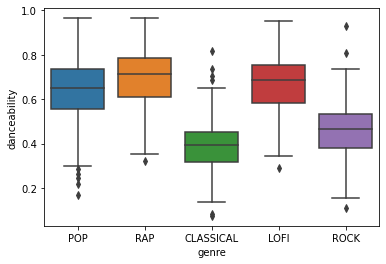

In [443]:
sns.boxplot(x=genre_df['genre'], y=genre_df['danceability'])


High danceability for rap, pop, and low for classical

#### energy

<AxesSubplot:xlabel='genre', ylabel='energy'>

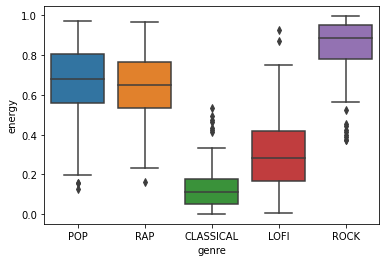

In [444]:
sns.boxplot(x=genre_df['genre'], y=genre_df['energy'])


lowest energy for classical music and lofi, very high for rock

#### loudness

<AxesSubplot:xlabel='genre', ylabel='loudness'>

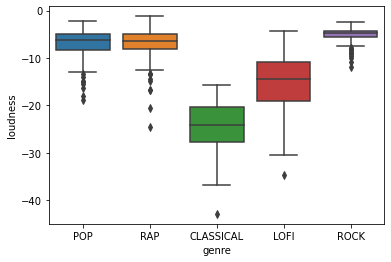

In [445]:
sns.boxplot(x=genre_df['genre'], y=genre_df['loudness'])


low loudness for classical and lofi, higher for pop, rap and rock

#### speechiness

<AxesSubplot:xlabel='genre', ylabel='speechiness'>

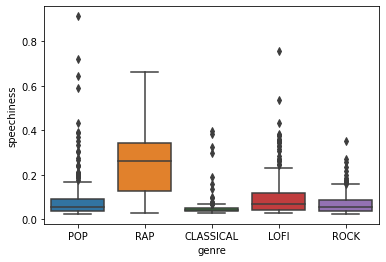

In [446]:
sns.boxplot(x=genre_df['genre'], y=genre_df['speechiness'])


high speechiness for rap because of more lyrics 

#### acousticness

<AxesSubplot:xlabel='genre', ylabel='acousticness'>

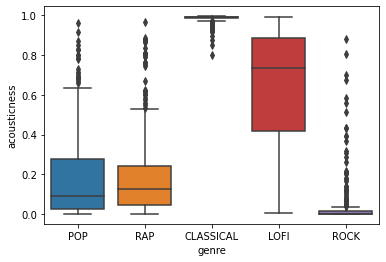

In [447]:
sns.boxplot(x=genre_df['genre'], y=genre_df['acousticness'])


classical has highest acousticness, rock has extremely low acousticness because of electric guitar, heavy drums

#### instrumentalness

<AxesSubplot:xlabel='genre', ylabel='instrumentalness'>

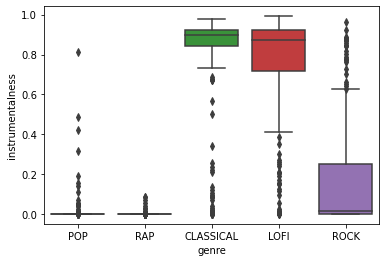

In [448]:
sns.boxplot(x=genre_df['genre'], y=genre_df['instrumentalness'])


classical and lofi are purely instrumental, hence have higher instrumentalness

#### liveness

<AxesSubplot:xlabel='genre', ylabel='liveness'>

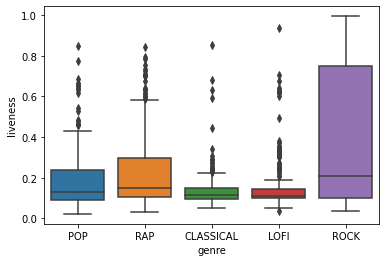

In [449]:
sns.boxplot(x=genre_df['genre'], y=genre_df['liveness'])


not much variation in data, can drop column

### valence

<AxesSubplot:xlabel='genre', ylabel='valence'>

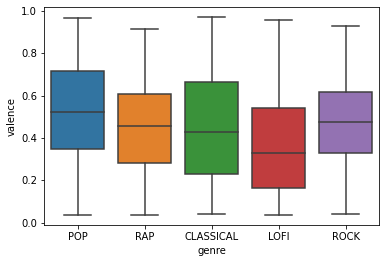

In [450]:
sns.boxplot(x=genre_df['genre'], y=genre_df['valence'])


#### tempo

<AxesSubplot:xlabel='genre', ylabel='tempo'>

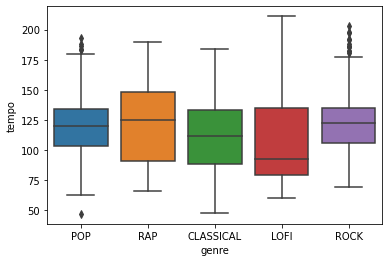

In [451]:
sns.boxplot(x=genre_df['genre'], y=genre_df['tempo'])


lofi music has low average tempo, while rap has higher average tempo

#### duration

<AxesSubplot:xlabel='genre', ylabel='duration_ms'>

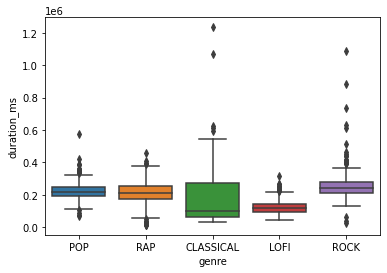

In [452]:
sns.boxplot(x=genre_df['genre'], y=genre_df['duration_ms'])


classical music has wide range of durations

### Categorical columns

#### key

In [453]:
key_map = {0: 'C',
           1: 'C#',
           2: 'D',
           3: 'Eb',
           4: 'E',
           5: 'F',
           6: 'F#',
           7: 'G',
           8: 'Ab',
           9: 'A',
           10: 'Bb',
           11: 'B'}
genre_df["key"] = genre_df["key"].map(key_map)
key = pd.get_dummies(genre_df['key'])
genre_df = pd.concat([genre_df, key], axis=1)
genre_df.drop('key', axis=1, inplace=True)


key_df = pd.pivot_table(genre_df,
                        values=['C', 'C#', 'D', 'Eb', 'E', 'F',
                                'F#', 'G', 'Ab', 'A', 'Bb', 'B'],
                        index='genre',
                        aggfunc={"C": np.sum,
                                 "C#": np.sum,
                                 "D": np.sum,
                                 "Eb": np.sum,
                                 "E": np.sum,
                                 "F": np.sum,
                                 "F#": np.sum,
                                 "G": np.sum,
                                 "Ab": np.sum,
                                 "A": np.sum,
                                 "Bb": np.sum,
                                 "B": np.sum})


[]

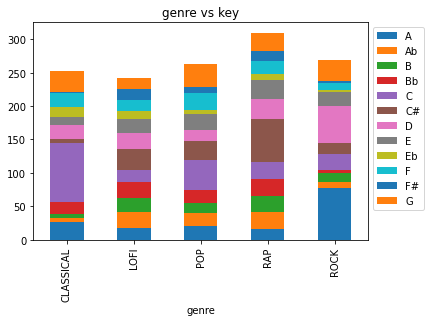

In [454]:
ax = key_df.plot.bar(stacked=True)
ax.set_title("genre vs key", color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


proportion of each key for a particular genre

In [455]:
genre_df.drop('B', axis=1, inplace=True)


#### mode

In [456]:
mode_map = {0: 'minor', 1: 'major'}
genre_df["mode"] = genre_df["mode"].map(mode_map)
mode = pd.get_dummies(genre_df['mode'])
genre_df = pd.concat([genre_df, mode], axis=1)
genre_df.drop('mode', axis=1, inplace=True)


mode_df = pd.pivot_table(genre_df,
                         values=['minor', 'major'],
                         index='genre',
                         aggfunc={"minor": np.sum, "major": np.sum})


[]

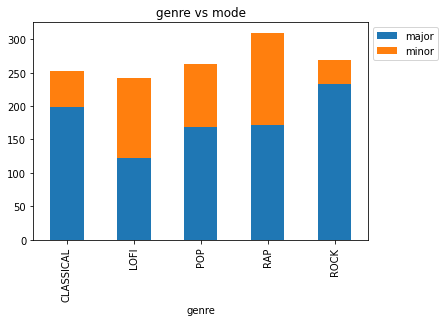

In [457]:
ax = mode_df.plot.bar(stacked=True)
ax.set_title("genre vs mode", color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


In [458]:
genre_df.drop('minor', axis=1, inplace=True)


#### genre

In [459]:
genre_df["genre"].value_counts()


RAP          310
ROCK         269
POP          263
CLASSICAL    253
LOFI         242
Name: genre, dtype: int64

In [460]:
genre_map = {
    'ROCK': 0,
    'POP': 1,
    'LOFI': 2,
    'CLASSICAL': 3,
    'RAP': 4
}

genre_df["genre"] = genre_df["genre"].map(genre_map)


## Training the model

In [461]:
X = genre_df.drop(["genre", "track_name", "artist",
                  "Unnamed: 0", "liveness"], axis=1)
y = genre_df["genre"].values


In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [463]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [464]:
genre_prediction_model = Sequential()


In [465]:
X_train.shape


(1002, 22)

In [466]:
genre_prediction_model.add(Flatten())

genre_prediction_model.add(Dense(22, activation='relu'))

genre_prediction_model.add(Dense(5, activation='sigmoid'))

genre_prediction_model.compile(
    loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [467]:
early_stop = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=25)


In [468]:
genre_prediction_model.fit(x=X_train, y=y_train, epochs=800, validation_data=(
    X_test, y_test), callbacks=[early_stop])


Epoch 1/800
32/32 [==============================] - 1s 11ms/step - loss: 1.5695 - accuracy: 0.2126 - val_loss: 1.5275 - val_accuracy: 0.2388
Epoch 2/800
32/32 [==============================] - 0s 3ms/step - loss: 1.4975 - accuracy: 0.3363 - val_loss: 1.4458 - val_accuracy: 0.4328
Epoch 3/800
32/32 [==============================] - 0s 3ms/step - loss: 1.4142 - accuracy: 0.4651 - val_loss: 1.3492 - val_accuracy: 0.5552
Epoch 4/800
32/32 [==============================] - 0s 3ms/step - loss: 1.3196 - accuracy: 0.5449 - val_loss: 1.2524 - val_accuracy: 0.6000
Epoch 5/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2264 - accuracy: 0.5878 - val_loss: 1.1667 - val_accuracy: 0.6179
Epoch 6/800
32/32 [==============================] - 0s 3ms/step - loss: 1.1414 - accuracy: 0.6208 - val_loss: 1.0893 - val_accuracy: 0.6418
Epoch 7/800
32/32 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.6267 - val_loss: 1.0254 - val_accuracy: 0.6567
Epoch 8/800


In [469]:
losses_df = pd.DataFrame(genre_prediction_model.history.history)


<AxesSubplot:>

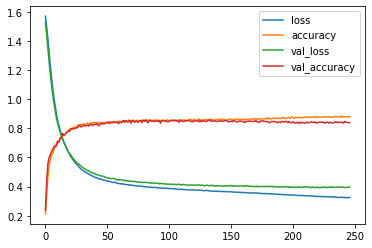

In [470]:
losses_df.plot()


In [471]:
from sklearn.metrics import classification_report


In [472]:
predict_x = genre_prediction_model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)


11/11 [==============================] - 0s 1ms/step


In [473]:
print(classification_report(y_test, classes_x))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        68
           1       0.73      0.64      0.68        75
           2       0.85      0.96      0.90        49
           3       0.98      0.93      0.95        67
           4       0.78      0.83      0.80        76

    accuracy                           0.84       335
   macro avg       0.84      0.85      0.85       335
weighted avg       0.84      0.84      0.84       335



In [474]:
!mkdir saved_model


A subdirectory or file saved_model already exists.


In [475]:
genre_prediction_model.save('saved_model/final_model')


INFO:tensorflow:Assets written to: saved_model/final_model\assets


In [476]:
def get_key_dict(key):
    d = {}
    lst = np.eye(12).tolist()[key]
    for i in range(len(lst)):
        d[key_map[i]] = lst[i]
    return d


In [477]:
def transform_key_dict(feat):
    key_dict = get_key_dict(feat["key"])
    feat.update(key_dict)
    del feat['key']
    del feat['B']
    return feat


In [479]:
import spotipy
import spotipy.util as util

import os
os.environ['SPOTIPY_CLIENT_ID'] = "6051b4896eda4feca0e0e28bed145907"
os.environ['SPOTIPY_CLIENT_SECRET'] = "1d7c94e540d741758cc103db6e028a96"
os.environ['SPOTIPY_REDIRECT_URI'] = "https://localhost:8080"

token = util.prompt_for_user_token("31zahq3gf5zm3oansaxx76hufvpm")

# AUTHENTICATION
sp = spotipy.Spotify(auth=token)


In [ ]:
def get_features(song_url):
    track = sp.track(song_url)
    features = sp.audio_features([track["id"]])[0]
    track_name = track["name"]
    features.pop('type')
    features.pop('uri')
    features.pop('track_href')
    features.pop('analysis_url')
    features.pop('id')
    features.pop('liveness')
    features = transform_key_dict(features)
    features['major'] = features['mode']
    del features['mode']
    return features


In [480]:
def predict_genre(song_url, model):
    data = pd.Series(get_features(song_url))
    data = scaler.transform([data])
    predict_x = model.predict(data, verbose=False)
    classes_x = np.argmax(predict_x)
    my_inverted_dict = dict(map(reversed, genre_map.items()))
    return my_inverted_dict[classes_x], sp.track(song_url)['artists'][0]['name'], sp.track(song_url)['name']
